In [1]:
# !pip install pandas_datareader

In [2]:
import pandas_datareader as pdr

In [3]:
# key ='8f3fe973f343e88abb3bf0410XXXXXXX'

In [4]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [5]:
# df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-13 00:00:00+00:00,156.99,157.28,156.41,156.73,16287608,37.246402,37.315206,37.108795,37.184716,65150432,0.0,1.0
1,AAPL,2017-10-16 00:00:00+00:00,159.88,160.00,157.65,157.90,23894630,37.932064,37.960535,37.402990,37.462303,95578520,0.0,1.0
2,AAPL,2017-10-17 00:00:00+00:00,160.47,160.87,159.23,159.78,18816438,38.072044,38.166945,37.777850,37.908339,75265752,0.0,1.0
3,AAPL,2017-10-18 00:00:00+00:00,159.76,160.71,159.60,160.42,16158659,37.903594,38.128985,37.865634,38.060181,64634636,0.0,1.0
4,AAPL,2017-10-19 00:00:00+00:00,155.98,157.08,155.02,156.75,42111326,37.006776,37.267755,36.779013,37.189462,168445304,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-10-05 00:00:00+00:00,146.40,147.38,143.0100,144.075,79470968,146.40,147.38,143.0100,144.075,79470968,0.0,1.0
1253,AAPL,2022-10-06 00:00:00+00:00,145.43,147.54,145.2200,145.810,68402169,145.43,147.54,145.2200,145.810,68402169,0.0,1.0
1254,AAPL,2022-10-07 00:00:00+00:00,140.09,143.10,139.4450,142.540,85925559,140.09,143.10,139.4450,142.540,85925559,0.0,1.0
1255,AAPL,2022-10-10 00:00:00+00:00,140.42,141.89,138.5729,140.420,74899002,140.42,141.89,138.5729,140.420,74899002,0.0,1.0
1256,AAPL,2022-10-11 00:00:00+00:00,138.98,141.35,138.2200,139.900,77033672,138.98,141.35,138.2200,139.900,77033672,0.0,1.0


In [10]:
df.shape

(1257, 14)

In [11]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000
mean,191.895863,193.905754,189.643705,191.669553,6.023340e+07,92.483305,93.511715,91.367046,92.411207,1.177465e+08,0.008473,1.002387
std,68.500185,69.148018,67.497683,68.211501,4.096141e+07,47.019849,47.599644,46.402518,47.003834,5.472853e+07,0.074307,0.084616
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,34.364620,35.217754,34.318700,34.797229,4.099995e+07,0.000000,1.000000
25%,148.260000,149.430000,146.470000,148.150000,2.776067e+07,46.963823,47.652491,46.465148,46.861944,8.137873e+07,0.000000,1.000000
50%,172.970000,174.500000,171.461000,172.780000,4.780059e+07,77.209066,78.111029,76.513755,77.216463,1.035588e+08,0.000000,1.000000
75%,209.680000,212.050000,207.700000,209.880000,8.444274e+07,137.398880,140.474601,135.441602,137.199158,1.375225e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,181.260451,182.186621,178.382353,181.877898,4.268849e+08,0.820000,4.000000


# Data cleaning

In [12]:
df1 = df.reset_index()['close']

In [13]:
df1.shape

(1257,)

In [14]:
import matplotlib.pyplot as plt

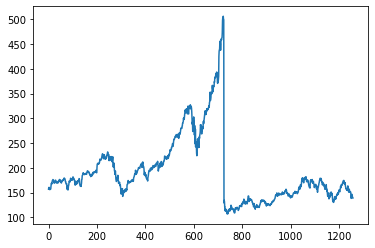

In [15]:
plt.plot(df1)

In [16]:
# LSTM is sensitive to data - need to transform it

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1.shape

(1257, 1)

In [20]:
df1

array([[0.12561052],
       [0.13284909],
       [0.13432686],
       ...,
       [0.08328115],
       [0.0841077 ],
       [0.08050094]])

# Spliting a data based on date

In [21]:
# split in train and test
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size

In [22]:
training_size, test_size

(817, 440)

In [23]:
train_data, test_data = df1[0: training_size, :], df1[training_size:len(df1), :]

In [24]:
train_data.shape, test_data.shape

((817, 1), (440, 1))

In [25]:
# create dataset

In [26]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0] #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
time_step=150
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [28]:
print(X_train)

[[0.12561052 0.13284909 0.13432686 ... 0.203732   0.20075141 0.19904822]
 [0.13284909 0.13432686 0.13254853 ... 0.20075141 0.19904822 0.20235441]
 [0.13432686 0.13254853 0.12308078 ... 0.19904822 0.20235441 0.20117721]
 ...
 [0.53971196 0.56270507 0.56761428 ... 0.056531   0.06053851 0.0494928 ]
 [0.56270507 0.56761428 0.59398873 ... 0.06053851 0.0494928  0.06031309]
 [0.56761428 0.59398873 0.61615529 ... 0.0494928  0.06031309 0.06314339]]


In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((666, 150), (666,), (289, 150), (289,))

In [30]:
716+339

1055

In [31]:
# reshape input to be [samples, time steps, features] which is req for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [32]:
X_train.shape, X_test.shape

((666, 150, 1), (289, 150, 1))

# Create stacked LSTM model 

In [33]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=100, verbose=1)

Epoch 1/100
11/11 [==============================] - 15s 734ms/step - loss: 0.0734 - val_loss: 0.0031
Epoch 2/100
11/11 [==============================] - 5s 432ms/step - loss: 0.0165 - val_loss: 0.0059
Epoch 3/100
11/11 [==============================] - 4s 331ms/step - loss: 0.0140 - val_loss: 0.0010
Epoch 4/100
11/11 [==============================] - 4s 365ms/step - loss: 0.0090 - val_loss: 3.5895e-04
Epoch 5/100
11/11 [==============================] - 4s 316ms/step - loss: 0.0115 - val_loss: 0.0031
Epoch 6/100
11/11 [==============================] - 3s 241ms/step - loss: 0.0071 - val_loss: 3.8372e-04
Epoch 7/100
11/11 [==============================] - 2s 228ms/step - loss: 0.0080 - val_loss: 4.2185e-04
Epoch 8/100
11/11 [==============================] - 3s 240ms/step - loss: 0.0072 - val_loss: 5.0241e-04
Epoch 9/100
11/11 [==============================] - 4s 334ms/step - loss: 0.0092 - val_loss: 0.0014
Epoch 10/100
11/11 [==============================] - 3s 291ms/step - loss

11/11 [==============================] - 3s 267ms/step - loss: 0.0017 - val_loss: 2.9834e-04
Epoch 70/100
11/11 [==============================] - 3s 281ms/step - loss: 0.0014 - val_loss: 2.7450e-04
Epoch 71/100
11/11 [==============================] - 3s 243ms/step - loss: 0.0017 - val_loss: 2.7115e-04
Epoch 72/100
11/11 [==============================] - 3s 238ms/step - loss: 0.0012 - val_loss: 3.2246e-04
Epoch 73/100
11/11 [==============================] - 3s 234ms/step - loss: 0.0020 - val_loss: 4.0114e-04
Epoch 74/100
11/11 [==============================] - 2s 225ms/step - loss: 0.0015 - val_loss: 3.7502e-04
Epoch 75/100
11/11 [==============================] - 3s 271ms/step - loss: 0.0024 - val_loss: 3.3856e-04
Epoch 76/100
11/11 [==============================] - 3s 274ms/step - loss: 0.0020 - val_loss: 2.8008e-04
Epoch 77/100
11/11 [==============================] - 4s 376ms/step - loss: 0.0015 - val_loss: 4.5916e-04
Epoch 78/100
11/11 [==============================] - 5s 43

In [37]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [38]:
# transform back to original form
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [39]:
import math
from sklearn.metrics import mean_squared_error

In [40]:
math.sqrt(mean_squared_error(y_train, train_pred))

241.22319300410902

In [41]:
# test data RMSE
math.sqrt(mean_squared_error(y_test, test_pred))

163.114266729516

# Plot the result

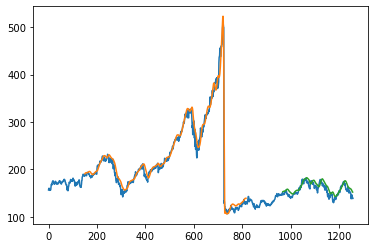

In [42]:
# shift train prediction
look_back = time_step
train_pred_plot = np.empty_like(df1)
train_pred_plot[:,:] = np.nan
train_pred_plot[look_back: len(train_pred) + look_back, :] = train_pred

# shift test pred
test_pred_plot = np.empty_like(df1)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_pred) + (look_back*2)+1:len(df1)-1, :] = test_pred

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.rcParams["figure.figsize"] = (15,15)
# plt.show()

# Future 30 days prediction

In [43]:
len(test_data) - time_step

290

In [44]:
x_input = test_data[len(test_data) - time_step:].reshape(1,-1)

In [45]:
x_input.shape

(1, 150)

In [46]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [47]:
temp_input[:10]

[0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113]

In [48]:
lst_output=[]
n_steps = time_step

In [49]:
i=0
days = 100
while(i < days):
    
    if(len(temp_input)> n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1101795]
151
1 day input [0.12944271 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257
 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879
 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626
 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563
 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861 0.14922981
 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362
 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237
 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912
 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817
 0.09252348 0.107201   0.10519724 0.10487163 0.11113338 0.096531
 0.09843456 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176
 0.06492173 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889
 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711 0.07484033
 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879 0.0952536
 0.09773325 0.09680651 0.10427051 0.10

8 day output [[0.11778481]]
9 day input [0.15524108 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387
 0.17765811 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021
 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995
 0.14584847 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318
 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721
 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626
 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828
 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348 0.107201
 0.10519724 0.10487163 0.11113338 0.096531   0.09843456 0.10487163
 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927
 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353
 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282
 0.1183469  0.11549155 0.1

16 day output [[0.1353219]]
17 day input [0.16899186 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204
 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441
 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412
 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534
 0.08395742 0.08435817 0.09252348 0.107201   0.10519724 0.10487163
 0.11113338 0.096531   0.09843456 0.10487163 0.10299311 0.08966813
 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609
 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849
 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155
 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747
 0.14850344 0.14770194

21 day output [[0.14577849]]
22 day input [0.15842204 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847
 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463
 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793
 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775
 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941
 0.09084534 0.08395742 0.08435817 0.09252348 0.107201   0.10519724
 0.10487163 0.11113338 0.096531   0.09843456 0.10487163 0.10299311
 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905
 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353
 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.1544145

28 day output [[0.1597159]]
29 day input [0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412
 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534
 0.08395742 0.08435817 0.09252348 0.107201   0.10519724 0.10487163
 0.11113338 0.096531   0.09843456 0.10487163 0.10299311 0.08966813
 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609
 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849
 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155
 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747
 0.14850344 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305
 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111
 0.16200376 0.15211021

36 day output [[0.17508988]]
37 day input [0.12804008 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237
 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912
 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817
 0.09252348 0.107201   0.10519724 0.10487163 0.11113338 0.096531
 0.09843456 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176
 0.06492173 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889
 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711 0.07484033
 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879 0.0952536
 0.09773325 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739
 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958
 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194
 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648
 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376 0.15211021
 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954
 0.1261866  0.12804008 0

44 day output [[0.1900958]]
45 day input [0.08946775 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828
 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348 0.107201
 0.10519724 0.10487163 0.11113338 0.096531   0.09843456 0.10487163
 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927
 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353
 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282
 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221 0.13943644
 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753
 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585
 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002
 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008
 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076
 0.11772073 0.12140263 

50 day output [[0.20117825]]
51 day input [0.07701941 0.09084534 0.08395742 0.08435817 0.09252348 0.107201
 0.10519724 0.10487163 0.11113338 0.096531   0.09843456 0.10487163
 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927
 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353
 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282
 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221 0.13943644
 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753
 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585
 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002
 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008
 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076
 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851
 0.11742016 0.11496556 

55 day output [[0.21035525]]
56 day input [0.107201   0.10519724 0.10487163 0.11113338 0.096531   0.09843456
 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.

63 day output [[0.22504623]]
64 day input [0.08966813 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905
 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353
 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.0805009

70 day output [[0.23803382]]
71 day input [0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849
 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155
 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747
 0.14850344 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305
 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111
 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666
 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897
 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263
 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556
 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728
 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077
 0.08050094 0.1101795  0.10893211 0.10861509 0.10911606 0.11024014
 0.11179898 0.11364229

75 day output [[0.24745798]]
76 day input [0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.1101795  0.10893211 0.10861509 0.10911606
 0.11024014 0.11179898 0.11364229 0.11566182 0.11778481 0.11996439
 0.12217125 0.1243873

81 day output [[0.25900233]]
82 day input [0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.1101795  0.10893211 0.10861509 0.10911606
 0.11024014 0.11179898 0.11364229 0.11566182 0.11778481 0.11996439
 0.12217125 0.12438731 0.1266012  0.12880561 0.13099581 0.13316856
 0.1353219  0.1374545

88 day input [0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115
 0.0841077  0.08050094 0.1101795  0.10893211 0.10861509 0.10911606
 0.11024014 0.11179898 0.11364229 0.11566182 0.11778481 0.11996439
 0.12217125 0.12438731 0.1266012  0.12880561 0.13099581 0.13316856
 0.1353219  0.13745457 0.13956612 0.14165682 0.14372727 0.14577849
 0.14781182 0.14982866 0.15183054 0.15381885 0.155

95 day output [[0.28742078]]
96 day input [0.12510958 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344
 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453
 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.1101795  0.10893211 0.10861509 0.10911606 0.11024014 0.11179898
 0.11364229 0.11566182 0.11778481 0.11996439 0.12217125 0.12438731
 0.1266012  0.12880561 0.13099581 0.13316856 0.1353219  0.13745457
 0.13956612 0.14165682 0.14372727 0.14577849 0.14781182 0.14982866
 0.15183054 0.15381885 0.15579508 0.15776041 0.15971591 0.16166262
 0.16360122 0.165532

In [50]:
day_new = np.arange(1,time_step+1)
day_pred = np.arange(time_step+1, time_step+days)

In [51]:
day_new.shape

(150,)

In [52]:
day_pred.shape

(99,)

In [53]:
len(df1)

1257

In [55]:
# plot the graph
plt.plot(day_new,scaler.inverse_transform(df1[1257:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:

df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)
